![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRQijeb73wMv-GZ-iXSNeIZyM2JeIbGfFHFhG9Da-PB-VzgmtNQ&usqp=CAU)

# Introduction

Deep Learning usually refers to training a __Neural Network__.

__NEURAL NETWORK__: A network of computational units, called _Neurons_.

![](https://miro.medium.com/max/1220/1*mzWqY5snL5pYrKo7r5-HZg.png)

__Example__: House Pricing

![](images/ExtraFeatures.png)

### Artificial Neural Network

We do not have to worry to understand which features are really useful to estimate house price, we want the model to infer and build such _composite features_ from data. Remember, we want a data driven world.

![](https://miro.medium.com/max/2384/1*xxOiQDg_nNXBSd9Q-K6uEQ.png)

To better understand how it works we are going to build a neural network step-by-step.

## Neural Network from scratch

Neural Networks are powerful tools in machine learning.

To explain their working scheme, let's picture them as a web of __neurons__, where each neuron is a computational unit like the following one

![title](https://miro.medium.com/max/645/0*LJBO8UbtzK_SKMog)

The output is the hypotesis out of the input variables.

Now, imagine to put such units in a group

![title](https://miro.medium.com/max/3000/1*bhFifratH9DjKqMBTeQG5A.gif)

The above Artificial Neural Network is composed of 3 layers: _INPUT_, _HIDDEN_, and _OUTPUT_. 
These $3$ layers have $3$, $4$ and $2$ Neurons, respectively. 
Each Neuron in the _INPUT_ layer connects with all Neurons in the _HIDDEN_ layer and each Neuron in the _HIDDEN_ layer connects with all Neurons in the _OUTPUT_ layer. The number of HIDDEN layers and the number of Neurons in each HIDDEN layer are arbitrary, depending on your choice.

## Build an Artificial Neural Network from scratch

The main goal of this notebook is to build the code of an artificial neural network without making use of very well-known python libraries (_e.g._ PyTorch, Keras, TensorFlow, etc.), in order to go through the steps of Neural Network training.

Consider a very simple example of a Neural Network with the following characteristics:

* $1$ Hidden Layer
* $2$ Input Layer Neurons
* $2$ Hidden Layer Neurons
* $1$ Output Neuron

![neurnetw](https://miro.medium.com/max/3040/1*jMoDBBPBPjx7mYhlrleRvA.png)

We usually denote these quantities with the following variables:

* $N$ is the total number of layers of the network.
* $l$ is the index running over the layers, $l = 1,\ldots, N$.
* $i$ is the index running over the neurons of a given layer.


### How does an Artificial Neural Network work?
__The INPUT layer:__ There are $2$ Neurons in this layer. The first one has value $x_1$, the second one has value $x_2$ and they don’t perform any task. They just pass their values to the connecting Neurons in the HIDDEN layer. That’s all.

__The HIDDEN layer:__ There are $2$ Neurons in this layer and each Neuron receives $2$ inputs $x_1$ and $x_2$ from the _INPUT_ layer. Also, there is a weight for each link between an _INPUT_ Neuron and a _HIDDEN_ Neuron. For example, the link ($x_1$, $h_1$) has a weight $w_{11}$, the link ($x_2$, $h_1$) has a weight $w_{21}$. Each _HIDDEN_ Neuron performs two tasks: __calculate Sum__ and __pass Sum__ through an Activation Function:

![oscar](https://miro.medium.com/max/2724/1*E7ulOdTP-yekFGIJ8H8eVw.png)

__The OUTPUT layer:__ There is only one Neuron and this Neuron also performs two tasks: __calculate Sum__ and __pass Sum__ through an Activation Function like the Neurons in the HIDDEN layer.

### Feedforward

#### Calculate Sum

The formula for calculating Sum is the following:

$$ z^{(1)}_1 = x_1 \times \beta^{(0)}_{11} + x_2 \times \beta^{(0)}_{21} + \beta^{(0)}_{01} $$

$$ z^{(1)}_2 = x_1 \times \beta^{(0)}_{12} + x_2 \times \beta^{(0)}_{22} + \beta^{(0)}_{02} $$

where $\beta^{(0)}_{01}$, $\beta^{(0)}_{02}$ are bias terms.

#### Pass Sum

Passing the sum means calculate the value of a given function, called __activation function__, on the sum just calculates.

A commonly used Activation Function is the [_sigmoid function_](https://en.wikipedia.org/wiki/Sigmoid_function):

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$


![sigmoid](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

So the _HIDDEN_ Neurons produce the following outputs:

$$ a^{(1)}_i = \sigma(z^{(1)}_i)\qquad i = 1,2 $$

Then the output layer:

$$ z^{(N)} = a^{(1)}_{1} \times \beta^{(1)}_{11} + a^{(1)}_2 \times \beta^{(1)}_{21} + \beta^{(1)}_{01} $$

and finally the hypothesis function:

$$ h_{\beta}(x) = a^{(N)} = \sigma(z^{(N)}) $$

The process of performing all operations as we have just done above to obtain the final output is called __Feedforward__. 

Summarily, an Artificial Neural Network takes in inputs, and then Neurons in the _HIDDEN_ layers perform their tasks to produce intermediate outputs and finally Neurons in the _OUTPUT_ layer perform their tasks to produce the final results.


We can give here the general formulas for __feedforward__

> $$ z^{(j)} = \beta^{(j-1)} a^{(j-1)} $$
> $$ a^{(j)} = g(z^{(j)}) $$

where $g$ is the activation function.

## Code implementation

Alright, we have described how an Artificial Neural Network works. Let’s implement the Artificial Neural Network as shown in Figure above.

We are going to define a class modelising the neural network.

In [1]:
import numpy as np
from scipy.special import expit

# While using (return 1 / (1 + np.exp(-z))), per the sigmoid function, I was getting an overflow warning.
# As a solution warning can be ignored, or the dtype can be changed to not cause the error/warning.
# I used expit method from scipy to eliminate this issue.
def sigmoid(x):
  # Sigmoid activation function: sigmoid(x) = 1 / (1 + e^(-x))
  return expit(x)

class NeuralNetwork:
    """
      A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (a1, a2)
        - an output layer with 1 neuron (h)
      """
    
    def __init__(self):
        # Randomly initialise weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Randomly initialise biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        a1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        a2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        h = sigmoid(self.w5 * a1 + self.w6 * a2 + self.b3)
        return h

Next, instantiating a Neural Network instance, and then pass an example input to it.

In [2]:
# Input: How frequently you coughed and sneezed in the last hour 
x = [20, 5]

# Create a Neural Network
n = NeuralNetwork()

# Feedforward
h = n.feedforward(x)

print("Weights:")
print("""  w1 = {}, 
  w2 = {}, 
  w3 = {}, 
  w4 = {}, 
  w5 = {}, 
  w6 = {} \n""".format(n.w1, n.w2, n.w3, n.w4, n.w5, n.w6))

print("Biases:")
print("""  b1 = {},
  b2 = {},
  b3 = {} \n""".format(n.b1, n.b2, n.b3))

print("Outputs:")
print("  h = {}".format(h))

Weights:
  w1 = 0.4884657411566488, 
  w2 = -0.6780259325203839, 
  w3 = -0.6433291513532657, 
  w4 = 0.4539296920475216, 
  w5 = 1.6698215716498144, 
  w6 = 0.6392700794335796 

Biases:
  b1 = 0.07932238780921497,
  b2 = 0.9141428292944149,
  b3 = 1.2837774293048347 

Outputs:
  h = 0.9503119632159168


Thus $y_{\mathrm{pred}} = h(x)$. 

We need to measure how good is this prediction. 

Imageine we have a set of predictions $\{y_\mathrm{pred}^i\}_{i=1,\ldots,n}$.
One can calculate the following quantity

$$ J = \frac{1}{n}\sum_{i=1}^{n}(y^i - y^i_{pred})^2 $$ 

The smaller is the value of $J$, the more precise is the prediction.

Obviously, if $y_{pred}$ changes, $J$ will change accordingly. So we can say $J$ is a function of the variable $y_{pred}$. 
It is quite easy to show that $J$ depends through $y_{pred}$ from the set of weights and biases. 
We denote such a set as $\beta$.

$$J(\beta) = \frac{1}{n}\sum_{i=1}^{n}(y^i - h_\beta^i(x))^2 $$

The goal is to minimise the value of J, with respect to weights and biases, _i.e._ with respect to $\beta$.

Obviously, if we nudge one of the weights or biases a bit, $J$ will change accordingly. So to make $J$ as small as possible we need to find particular weights and biases at which $J$ is minimum. 
How could we do that? Fortunately, there is an optimization algorithm that we can utilize to find particular weights and biases. That optimization algorithm is called __Stochastic Gradient Descent__.

### Backpropagation

#### Stochastic Gradient Descent

The algorithm scheme is pretty simple.

1. Initialize random weights and biases for the first item in the ground-truth dataset.

2. Calculate gradients (partial derivative) of the cost function:
$$ \partial_\beta J(\beta) $$

3. Update weights and biases using the following formulas:
$$ \beta = \beta - \alpha \partial_\beta J $$

Where $\alpha$ is a positive constant called __learning rate__.

4. Go back and repeat from Step 1 for the next item in the ground-truth dataset.

The process of calculating gradients and updating weights and biases is called __Backpropagation__ because it propagates information about the error back to the entire neural network.

Alright, let’s do some math to work out gradients for our Artificial Neural Network. With the support of the [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule), we can represent gradients as follows.

$$\partial_\beta J = \partial_{y_\mathrm{pred}} J\ \partial_\beta h_\beta(x) = -2 \left(y - h_\beta(x)\right) \ \partial_\beta h_\beta(x) $$

One can see everything depends on the derivative of the hypotesis function.

The _sigmoid_ has been chosen as activation function also beacuse of the structure of its derivative.
Indeed, it holds

$$ \partial_x \sigma(x) = \sigma(x) (1-\sigma(x)) $$

Hence, for the activation function being the sigmoid,

$$ \partial_\beta J = -2 \left(y - \sigma(\beta x)\right) \sigma(\beta x) \left(1-\sigma(\beta x)\right) $$

From this one can work out partial derivatives with respect to all the different weights and biases.

#### Code for backpropagation

In [3]:
def d_sigmoid(x):
    """
        Derivative of sigmoid activation function: d_sigmoid(x) = sigmoid(x) * (1 - sigmoid(x))
    """
    return sigmoid(x) * (1 - sigmoid(x))

def J(y_true, y_pred):
    """
        Cost or Loss function
    """ 
    return ((y_true - y_pred) ** 2).mean()

And let's build a new version of the class `NeuralNetwork`

In [4]:
class NeuralNetwork:
    """
        A neural network with:
            - 2 inputs
            - a hidden layer with 2 neurons (a1, a2)
            - an output layer with 1 neuron (h)
    """

    def __init__(self):
        # Initialize weights and biases
        self.beta0 = np.random.normal(size=(2,3))
        self.beta1 = np.random.normal(size=(1,3))
    

    def feedforward(self, x):
        a11 = sigmoid(self.beta0[0,1] * x[0] + self.beta0[0,2] * x[1] + self.beta0[0,0])
        a12 = sigmoid(self.beta0[1,1] * x[0] + self.beta0[1,2] * x[1] + self.beta0[1,0])
        h = sigmoid(self.beta1[0,1] * a11 + self.beta1[0,2] * a12 + self.beta1[0,0])
        return h

    def train(self, ground_truth_dataset, epoch, lr):
        # ground_truth_dataset: has shape (n, 3), where n is the number of items.
        # epoch: the number of times to loop through the entire ground truth dataset
        # lr: learning rate

        epochs = []
        min_losses = []
        avg_losses = []
        max_losses = []
        y_trues = np.array(ground_truth_dataset)[:, 2]

        for ep in range(epoch):
            costs = []
            for item in ground_truth_dataset:
                # input
                x1, x2 = item[:2]

                # real result
                y_true = item[2]

                # ====== Feed forward ======
                # Neuron a1
                z1 = self.beta0[0,1] * x1 + self.beta0[0,2] * x2 + self.beta0[0,0]
                a1 = sigmoid(z1)

                # Neuron a2
                z2 = self.beta0[1,1] * x1 + self.beta0[1,2] * x2 + self.beta0[1,0]
                a2 = sigmoid(z2)

                # Neuron h
                z = self.beta1[0,1] * a1 + self.beta1[0,2] * a2 + self.beta1[0,0]
                h = sigmoid(z)
                y_pred = h

                cost = J(y_true, y_pred)
                costs.append(cost)

                # ====== Back propagation ======
                # Calculate gradients for OUTPUT layer
                dJ_dy_pred = -2 * (y_true - y_pred)

                dJ_db101 = dJ_dy_pred * d_sigmoid(z) * a1
                dJ_db102 = dJ_dy_pred * d_sigmoid(z) * a2
                dJ_db100 = dJ_dy_pred * d_sigmoid(z)

                # Calculate gradients for HIDDEN layer
                dJ_db001 = dJ_dy_pred * self.beta1[0,1] * d_sigmoid(z) * d_sigmoid(z1) * x1
                dJ_db002 = dJ_dy_pred * self.beta1[0,1] * d_sigmoid(z) * d_sigmoid(z1) * x2
                dJ_db011 = dJ_dy_pred * self.beta1[0,2] * d_sigmoid(z) * d_sigmoid(z2) * x1
                dJ_db012 = dJ_dy_pred * self.beta1[0,2] * d_sigmoid(z) * d_sigmoid(z2) * x2
                dJ_db000 = dJ_dy_pred * self.beta1[0,1] * d_sigmoid(z) * d_sigmoid(z1)
                dJ_db010 = dJ_dy_pred * self.beta1[0,2] * d_sigmoid(z) * d_sigmoid(z2)

                # Update weights and biases
                self.beta0[0,1] -= lr * dJ_db001
                self.beta0[0,2] -= lr * dJ_db002
                self.beta0[1,1] -= lr * dJ_db011
                self.beta0[1,2] -= lr * dJ_db012
                self.beta1[0,1] -= lr * dJ_db101
                self.beta1[0,2] -= lr * dJ_db102

                self.beta0[0,0] -= lr * dJ_db000
                self.beta0[1,0] -= lr * dJ_db010
                self.beta1[0,0] -= lr * dJ_db100

            epochs.append(ep)
            min_losses.append(min(costs))
            avg_losses.append(sum(costs) / len(costs))
            max_losses.append(max(costs))
            if ep % 1000 == 0:
                print("Epoch {}: min_loss = {}, avg_loss = {}, max_loss = {}".format(
                    ep, min_losses[ep], avg_losses[ep], max_losses[ep]))

        return (epochs, min_losses, avg_losses, max_losses)

The training process is implemented in the method `train`.
Usually, to find out the optimal values of weights and biases, we need to perform _Backpropagation_ (update weights and biases) many times again and again. 

But because the size of our ground-truth dataset is very limited, so we only need to loop through the ground-truth dataset epoch times as implemented above. 
Also, to help evaluate our Neural Network after the training process is finished, we collect minimum loss, average loss and maximum loss for each epoch and return them at the end.

Now it’s time to start training our Artificial Neural Network using the sample ground-truth dataset as given below.

Epoch 0: min_loss = 0.03077585033741904, avg_loss = 0.2902126859283759, max_loss = 0.6797793349278257
Epoch 1000: min_loss = 0.07755647978897927, avg_loss = 0.25417397764551575, max_loss = 0.5204191734510574
Epoch 2000: min_loss = 0.1243724165547119, avg_loss = 0.24120979218499347, max_loss = 0.4189176107441479
Epoch 3000: min_loss = 0.14724912047962002, avg_loss = 0.23867847504546452, max_loss = 0.3796795264181892
Epoch 4000: min_loss = 0.15532333320661462, avg_loss = 0.23761447209786066, max_loss = 0.36698343224121455
Epoch 5000: min_loss = 0.15762130978401875, avg_loss = 0.2361207256468886, max_loss = 0.3634023507542844
Epoch 6000: min_loss = 0.15755621236495732, avg_loss = 0.23288956361338414, max_loss = 0.3629730942726151
Epoch 7000: min_loss = 0.15437132843279286, avg_loss = 0.2234143911034269, max_loss = 0.35414641094508276
Epoch 8000: min_loss = 0.13404359690014472, avg_loss = 0.19903626143952285, max_loss = 0.3320870696706029
Epoch 9000: min_loss = 0.11298592922022024, avg_los

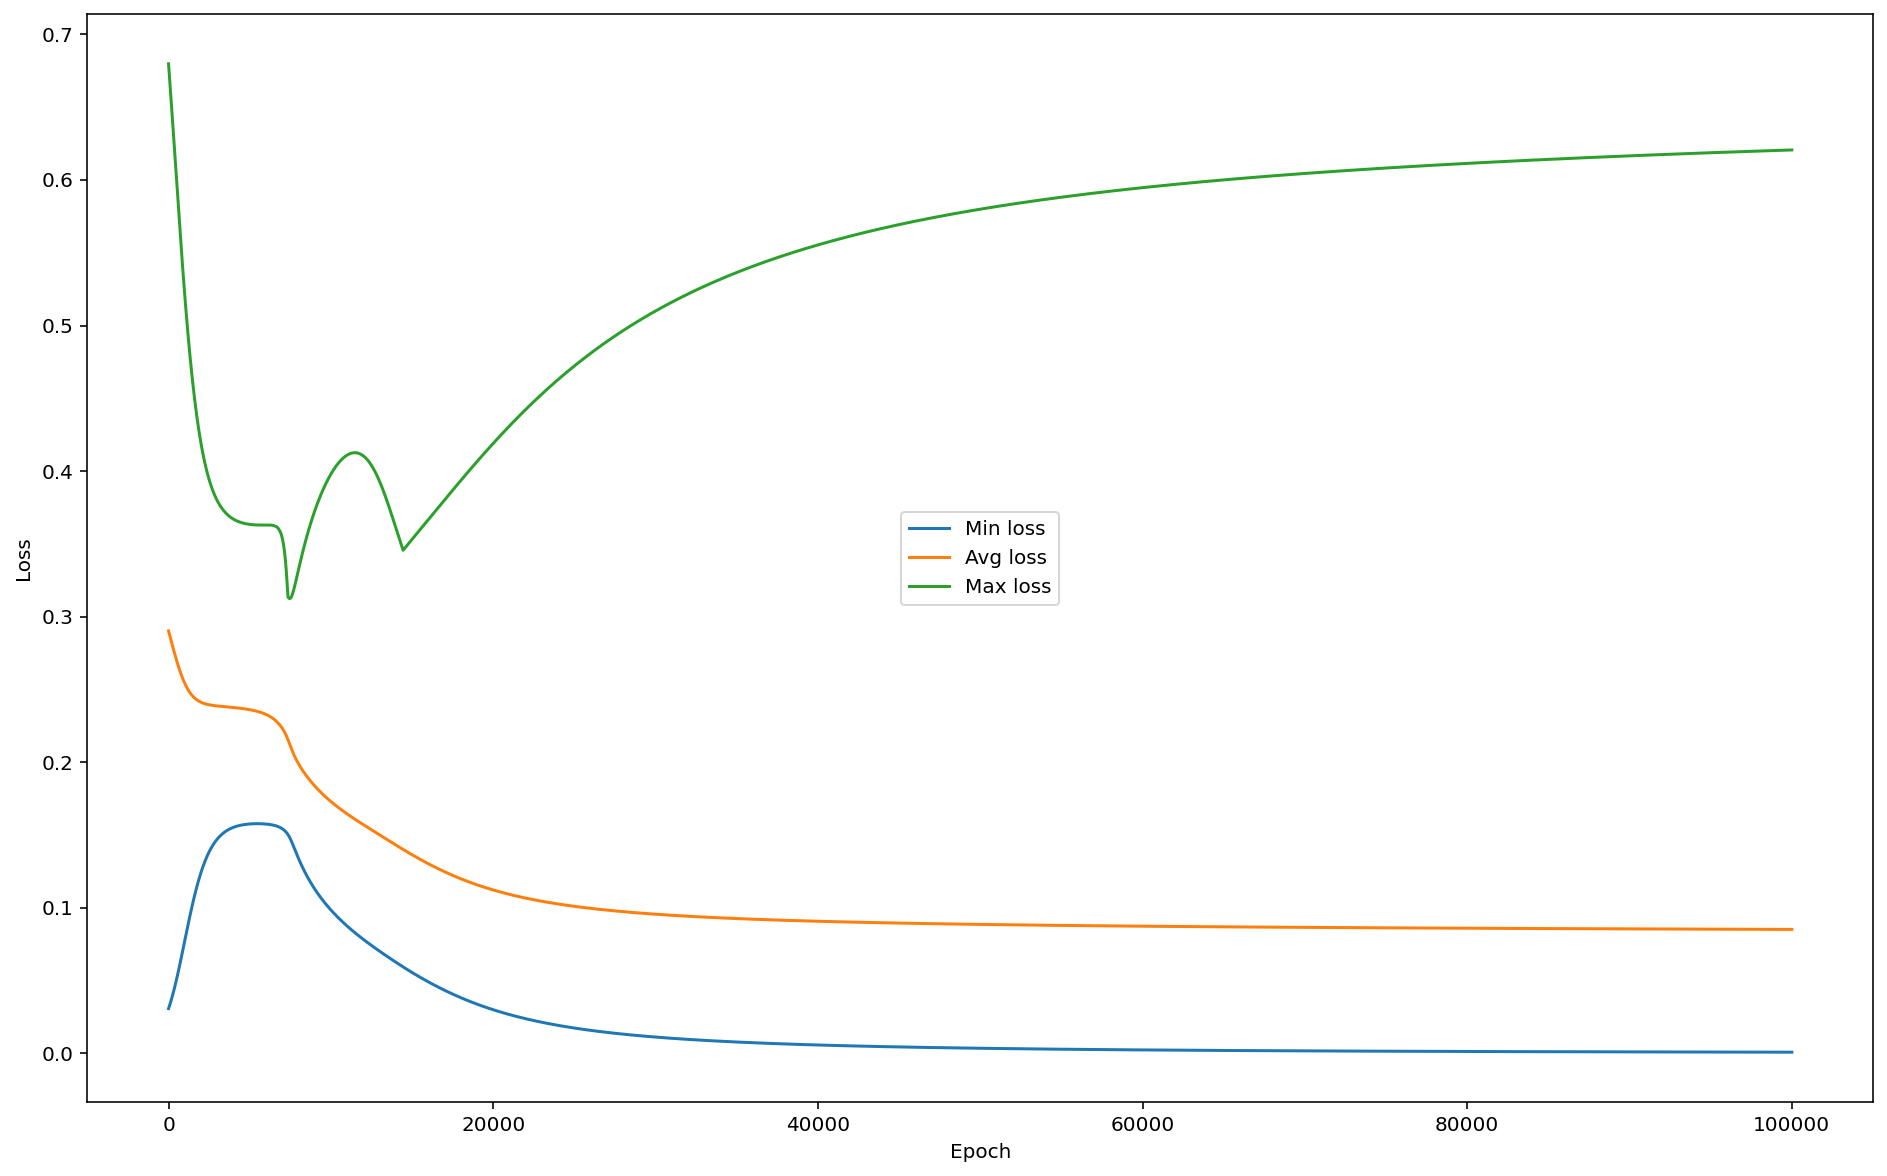

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import pickle

ground_truth_dataset = [
  [15, 3, 1],
  [10, 5, 1],
  [20, 1, 1],
  [1,  5, 0],
  [5,  0, 0],
  [30, 0, 1],
  [2,  1, 0],
  [5,  5, 1],
  [7, 10, 0],
  [25, 6, 1]
]

epoch = 100000
learning_rate = 0.001

n = NeuralNetwork()

stats = n.train(ground_truth_dataset, epoch, learning_rate)
epochs = stats[0]
min_losses = stats[1]
avg_losses = stats[2]
max_losses = stats[3]

with open("models/model.bin", "wb") as f:
    pickle.dump(n, f)


plt.figure(figsize=(16,10))
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(epochs, min_losses, label="Min loss")
plt.plot(epochs, avg_losses, label="Avg loss")
plt.plot(epochs, max_losses, label="Max loss")
plt.legend(loc="center")
plt.show();

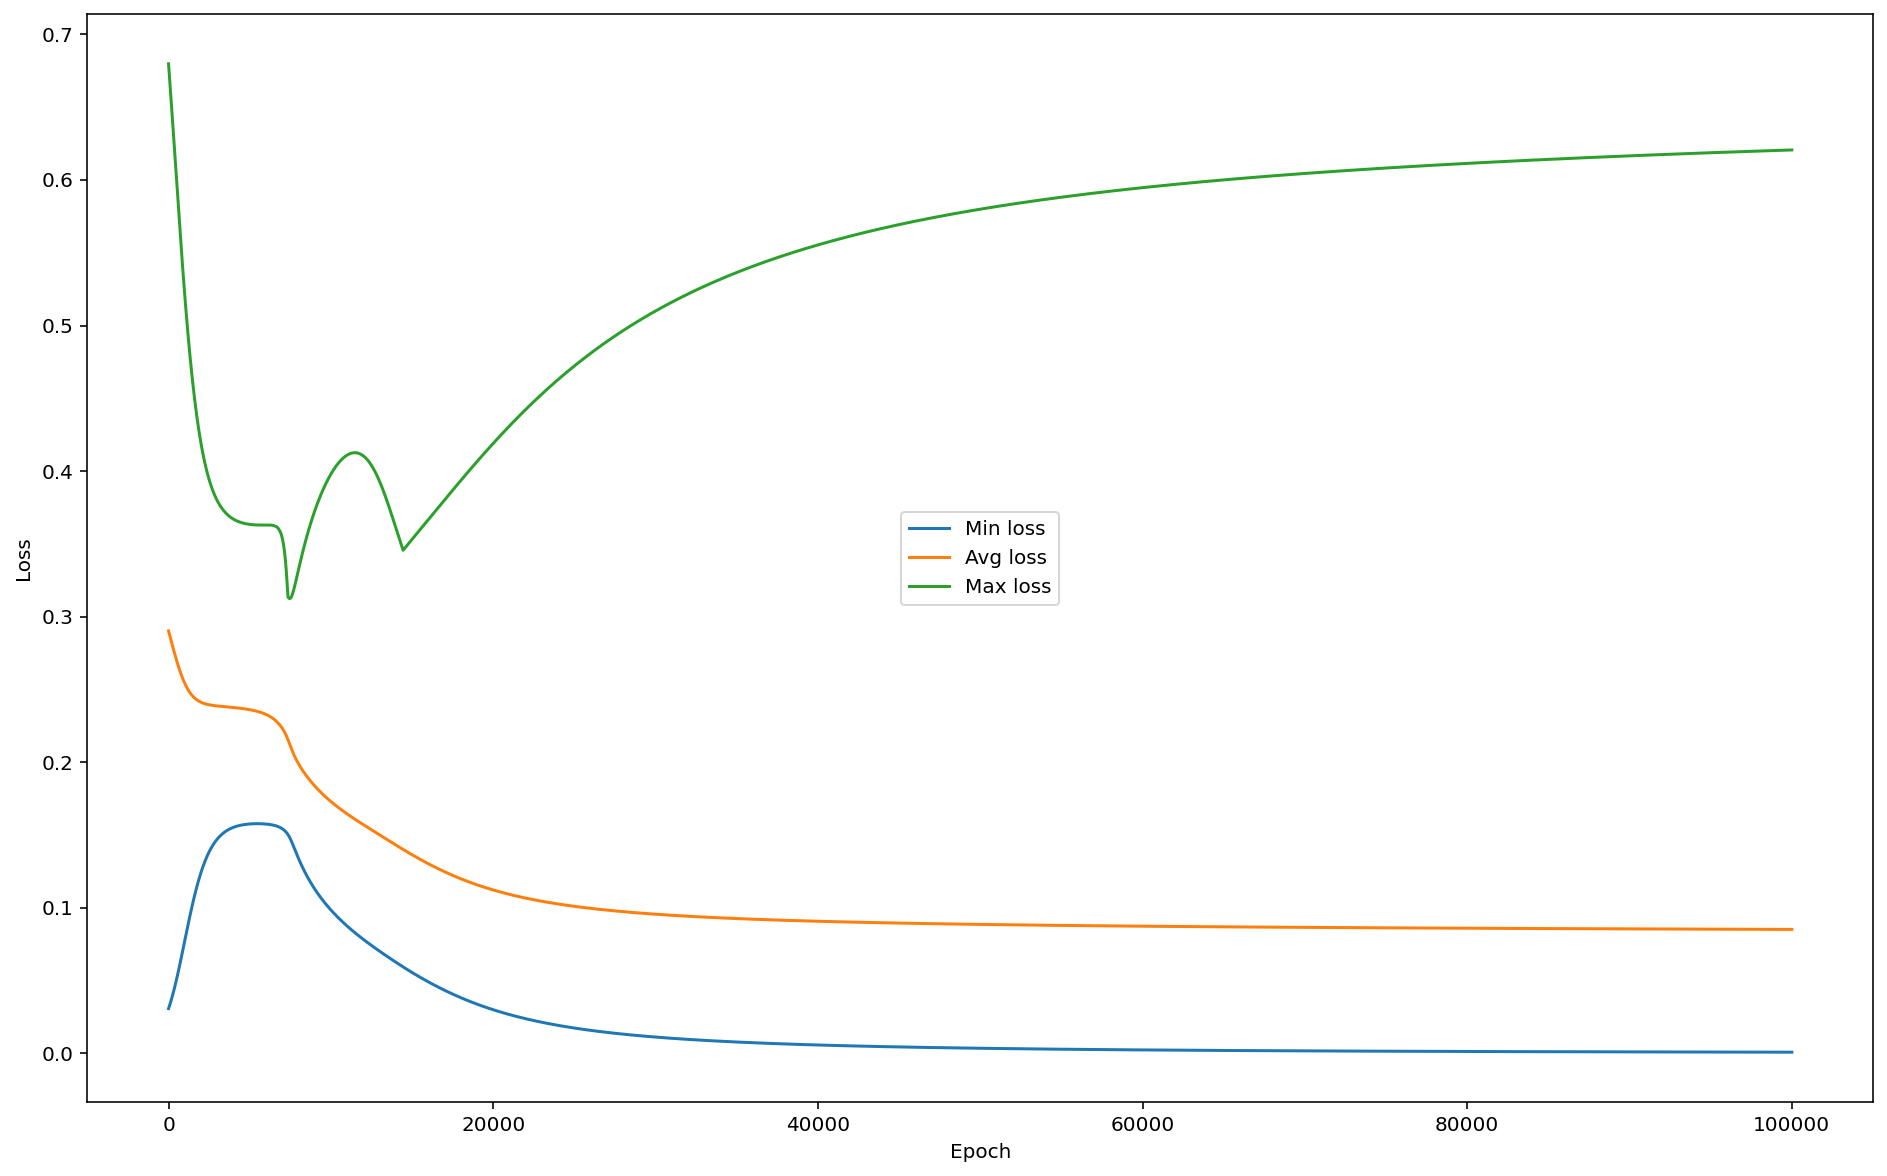

In [6]:
plt.figure(figsize=(16,10))
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(epochs, min_losses, label="Min loss")
plt.plot(epochs, avg_losses, label="Avg loss")
plt.plot(epochs, max_losses, label="Max loss")
plt.legend(loc="center")
plt.show()

In [7]:
import sys
import pickle

## to insert into a script
# import argparse
# from ann import NeuralNetwork

#parser = argparse.ArgumentParser()
#parser.add_argument("-c", "--cough", required=True, help="The number of coughs per hour.")
#parser.add_argument("-s", "--sneeze", required=True, help="The number of sneezes per hour.")
#args = vars(parser.parse_args())

args = {'cough': 25, 'sneeze': 10}

x = [int(args["cough"]), int(args["sneeze"])]
if x[0] < 0 or x[1] < 0:
    print("One of arguments is minus!")
    sys.exit(1)

with open("models/model.bin", "rb") as model:
    n = pickle.load(model)
    p = n.feedforward(x)
    percent = int(p * 100)
    if percent >= 50:
        print("Warning! You are {}% POSITIVE with flu.".format(percent))
    else:
        print("Congratulation! You may have not flu. With probability {}%".format(1 - percent))

Warning! You are 97% POSITIVE with flu.


## Bibliography and Extra Readings

A free and very good resource is [this book](https://www.deeplearningbook.org/).

[Fast.ai](https://www.fast.ai/) website has always a great amount of quite advanced, but well explained material.